In [2]:
import sys
import os

pwd = os.getcwd()
python_path = pwd[: pwd.rfind("/")]
sys.path.append(python_path)

In [3]:
import cv2 as cv
import numpy as np
import jupyter_black

from utils import show_images, read_images
from constants import (
    SEGMENTATION_OBJECT_PATH,
    ORIGINAL_IMAGES_PATH,
    ORIGINAL_SUBSTRATES_PATH,
)

jupyter_black.load()

In [4]:
def read_and_grayscale(path: str):
    bgr_images = read_images(path)
    gray_images = [cv.cvtColor(image, cv.COLOR_BGR2GRAY) for image in bgr_images]
    return gray_images


object_images = read_and_grayscale(SEGMENTATION_OBJECT_PATH)
original_images = read_and_grayscale(ORIGINAL_IMAGES_PATH)

In [5]:
object_images[0].shape

(890, 1280)

In [6]:
assert len(object_images) == len(original_images)

/usr/src/data/substrates/substrate_0_0_0.png
/usr/src/data/substrates/substrate_0_0_1.png
/usr/src/data/substrates/substrate_0_0_5.png
/usr/src/data/substrates/substrate_0_0_6.png
/usr/src/data/substrates/substrate_0_0_7.png
/usr/src/data/substrates/substrate_0_0_8.png
/usr/src/data/substrates/substrate_0_0_9.png
/usr/src/data/substrates/substrate_0_0_10.png
/usr/src/data/substrates/substrate_0_0_11.png
/usr/src/data/substrates/substrate_0_0_12.png
/usr/src/data/substrates/substrate_0_0_13.png
/usr/src/data/substrates/substrate_0_0_14.png
/usr/src/data/substrates/substrate_0_0_15.png
/usr/src/data/substrates/substrate_0_0_16.png
/usr/src/data/substrates/substrate_0_1_0.png
/usr/src/data/substrates/substrate_0_1_4.png
/usr/src/data/substrates/substrate_0_1_5.png
/usr/src/data/substrates/substrate_0_1_6.png
/usr/src/data/substrates/substrate_0_1_7.png
/usr/src/data/substrates/substrate_0_1_8.png
/usr/src/data/substrates/substrate_0_1_9.png
/usr/src/data/substrates/substrate_0_1_10.png
/u

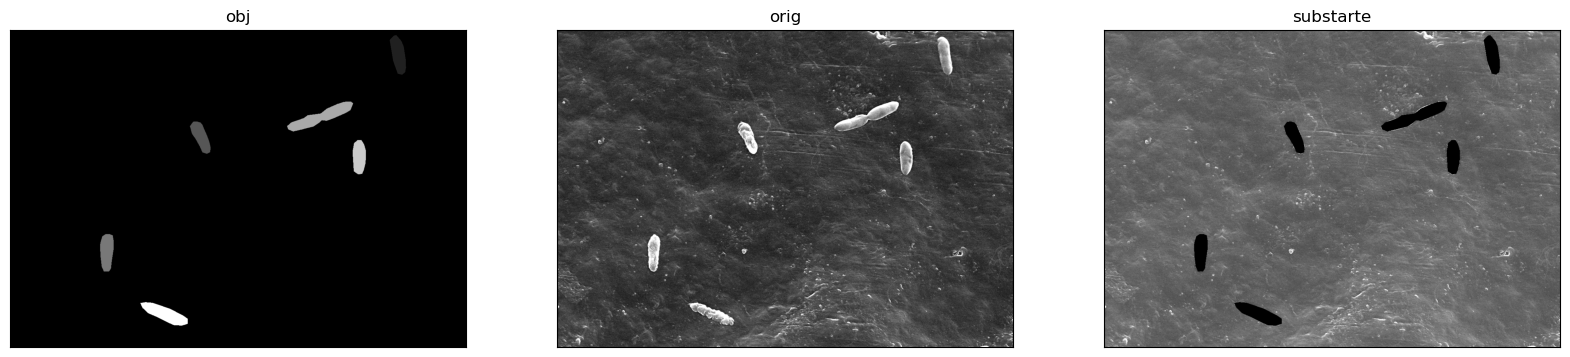

In [11]:
for i in range(len(object_images)):
    object_image = object_images[i]
    original_image = original_images[i]

    substrate_mask = (object_image == 0).astype(np.uint8)
    substrate = substrate_mask * original_image

    show_images(
        [
            (object_image, "obj"),
            (original_image, "orig"),
            (substrate, "substarte"),
        ],
        grid=(1, 3),
        size_inches=(20, 5),
    )

    kernel_size = 64
    for j in range(substrate.shape[0] // kernel_size):
        for k in range(substrate.shape[1] // kernel_size):
            cropped_substrate = substrate[
                j * kernel_size : j * kernel_size + kernel_size,
                k * kernel_size : k * kernel_size + kernel_size,
            ]
            if np.count_nonzero(cropped_substrate) == cropped_substrate.size:
                file_name = f"{ORIGINAL_SUBSTRATES_PATH}/substrate_{i}_{j}_{k}.png"
                print(file_name)
                cv.imwrite(file_name, cropped_substrate)